# Введение
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».\
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!\
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.\
\
Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:\
`id` — уникальный идентификатор коровы.\
`Удой, кг` — масса молока, которую корова даёт в год (в килограммах).\
`ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.\
`Сырой протеин, г` — содержание сырого протеина в корме (в граммах).\
`СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.\
`Порода` — порода коровы.\
`Тип пастбища` — ландшафт лугов, на которых паслась корова.\
`порода папы_быка` — порода папы коровы.\
`Жирность,%` — содержание жиров в молоке (в процентах).\
`Белок,%` — содержание белков в молоке (в процентах).\
`Вкус молока`— оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).\
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).\
\
Признаки в датасете `ferma_main.csv` можно разделить на группы.\
Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`\
Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.\
Характеристика пастбища: `Тип пастбища`.\
Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.\
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.\
\
Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:\
`id` — уникальный идентификатор коровы.\
`Имя Папы` — имя папы коровы.\
\
Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:\
`Порода` — порода коровы.\
`Тип пастбища` — ландшафт лугов, на которых паслась корова.\
`порода папы_быка` — порода папы коровы.\
`Имя_папы` — имя папы коровы.\
`Текущая_жирность,%` — содержание жиров в молоке (в процентах).\
`Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).\
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')

In [3]:
#Переименуем некоторые столбцы
ferma_main.columns = ['id','удой_кг', 'эке(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо(сахаро_протеиновое_соотношение)','порода','тип_пастбища', 'порода_папы_быка','жирность_%', 'белок_%', 'вкус_молока', 'возраст'] 

In [4]:
ferma_main.head()

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [5]:
ferma_dad.columns = ['id', 'имя_папы']
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
cow_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'текущая_жирность_%', 'текущий_уровень_белок_%', 'возраст']
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Во время данного этапа были импортированы все необходимы библиотеки, сохранены датасеты и переименованы некоторые столбцы в них.

##  Предобработка данных

In [7]:
#Сначала рассмотрим датасет ferma_main
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    634 non-null    int64  
 1   удой_кг                               634 non-null    int64  
 2   эке(энергетическая_кормовая_единица)  634 non-null    float64
 3   сырой_протеин_г                       634 non-null    int64  
 4   спо(сахаро_протеиновое_соотношение)   634 non-null    float64
 5   порода                                634 non-null    object 
 6   тип_пастбища                          634 non-null    object 
 7   порода_папы_быка                      634 non-null    object 
 8   жирность_%                            634 non-null    float64
 9   белок_%                               634 non-null    float64
 10  вкус_молока                           634 non-null    object 
 11  возраст            

In [8]:
ferma_main.describe()

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),жирность_%,белок_%
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [9]:
ferma_main.isna().sum()

id                                      0
удой_кг                                 0
эке(энергетическая_кормовая_единица)    0
сырой_протеин_г                         0
спо(сахаро_протеиновое_соотношение)     0
порода                                  0
тип_пастбища                            0
порода_папы_быка                        0
жирность_%                              0
белок_%                                 0
вкус_молока                             0
возраст                                 0
dtype: int64

In [10]:
ferma_main.duplicated().sum()

5

In [11]:
ferma_main = ferma_main.drop_duplicates()

In [12]:
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [13]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [14]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [15]:
#Избавляемся от неявных дубликатов
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')

In [16]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

In [17]:
ferma_main.shape

(629, 12)

In [18]:
#Теперь рассмотрим датасет ferma_dad
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [19]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [20]:
ferma_dad.shape

(629, 2)

In [21]:
#И, наконец, рассмотррим датасет cow_buy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность_%       20 non-null     float64
 5   текущий_уровень_белок_%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [22]:
cow_buy.describe()

,текущая_жирность_%,текущий_уровень_белок_%
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [23]:
cow_buy.isna().sum()

порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность_%         0
текущий_уровень_белок_%    0
возраст                    0
dtype: int64

In [24]:
cow_buy.duplicated().sum()

4

In [25]:
cow_buy = cow_buy.drop_duplicates()

In [26]:
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [27]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [28]:
cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [29]:
cow_buy.shape

(16, 7)

Был проведён первичный анализ датасетов `ferma_main`, `ferma_dad`, `cow_buy`. Пропуски отсутствуют, типы данных указаны верно. Явные и неявные дубликаты были удалены.

## Исследовательский анализ данных

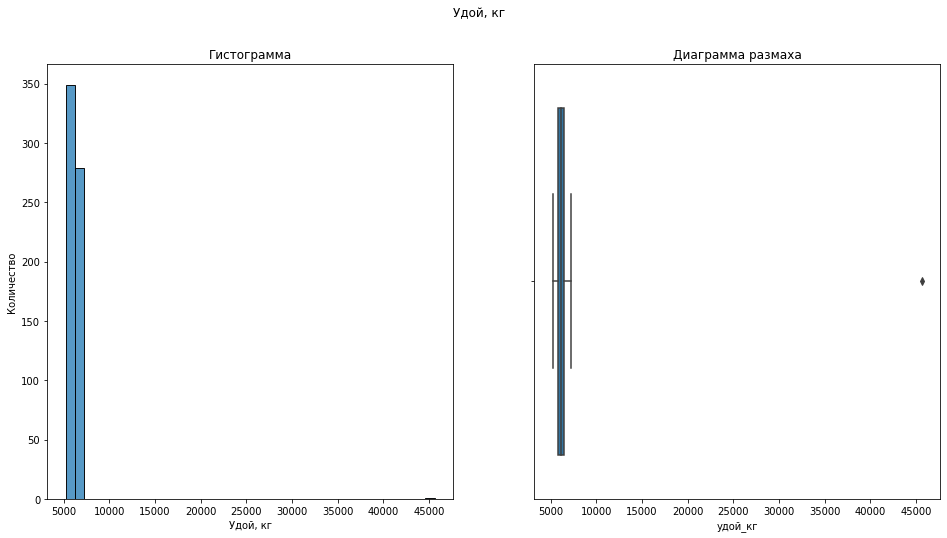

In [30]:
#Посмотрим на графики без выброса
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'удой_кг', ax=axs[0], bins = 40)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sns.boxplot(data = ferma_main,x = 'удой_кг', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удой, кг')
plt.show()

In [31]:
ferma_main = ferma_main.loc[ferma_main['удой_кг'] <= 10000]

В столбце удой есть одно аномально высокое значение, удалим его. Медианное значение по данному столбцу - 6133.000000

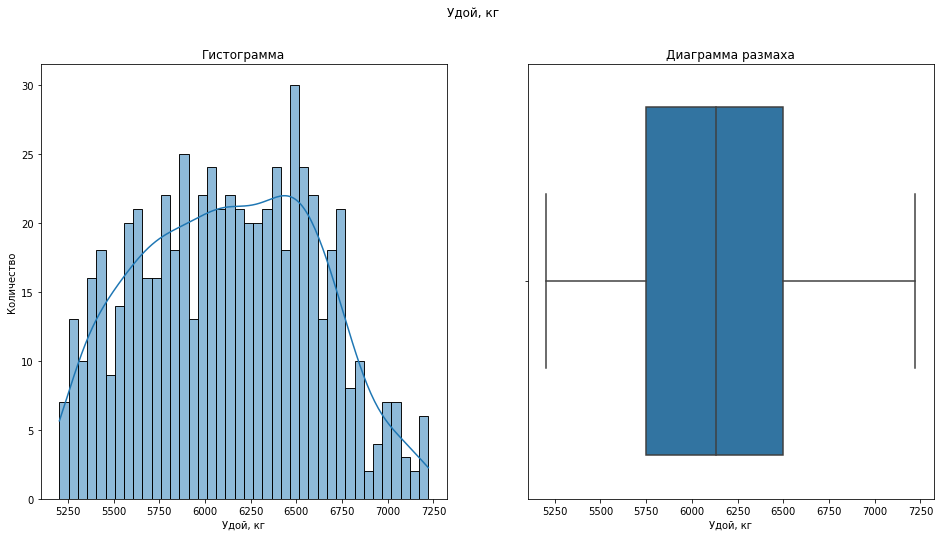

In [32]:
#Посмотрим на графики без выброса
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'удой_кг', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'удой_кг', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Удой, кг')
fig.suptitle('Удой, кг')
plt.show()

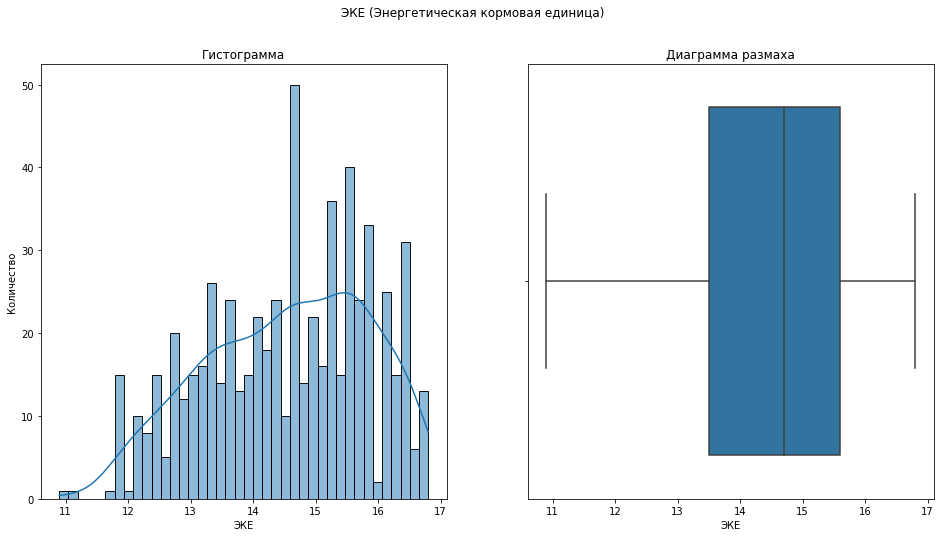

In [33]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'эке(энергетическая_кормовая_единица)', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('ЭКЕ')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'эке(энергетическая_кормовая_единица)', ax=axs[1])
axs[1].set_xlabel('ЭКЕ')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

Выбросов в данном столбце нет, медианное значение - 14.700000

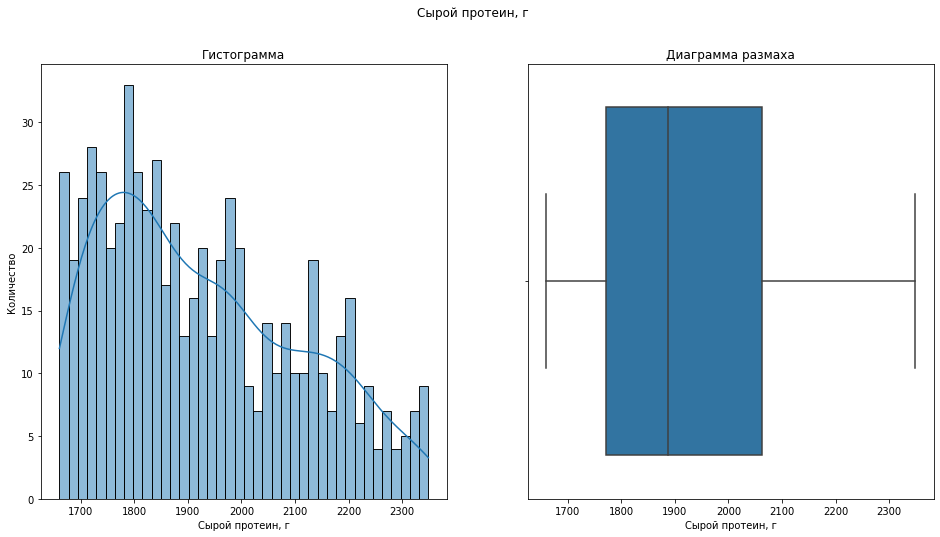

In [34]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'сырой_протеин_г', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Сырой протеин, г')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'сырой_протеин_г', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Сырой протеин, г')
fig.suptitle('Сырой протеин, г')
plt.show()

Выбросов нет, медианное значение - 1888.000000

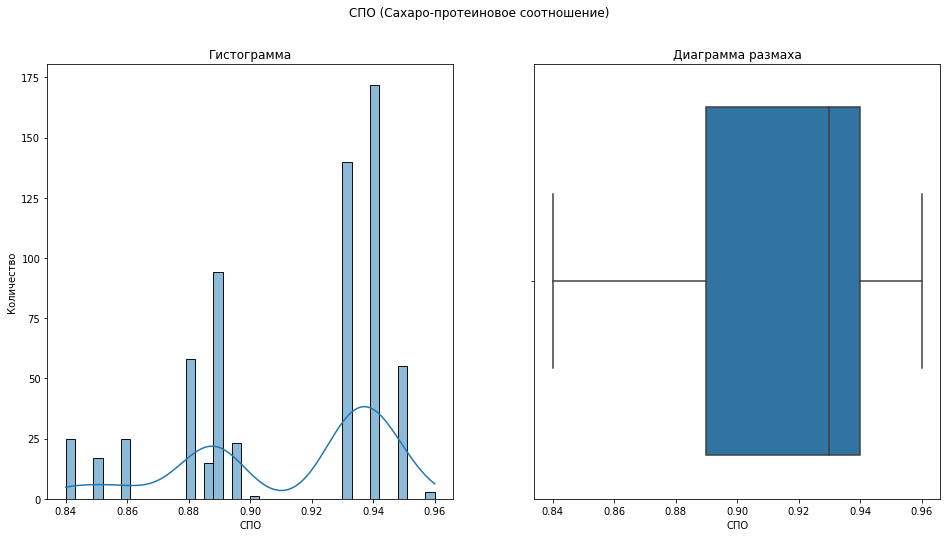

In [35]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'спо(сахаро_протеиновое_соотношение)', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('СПО')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'спо(сахаро_протеиновое_соотношение)', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('СПО')
fig.suptitle('СПО (Сахаро-протеиновое соотношение)')
plt.show()

Выбросов нет, медианное значение - 0.93

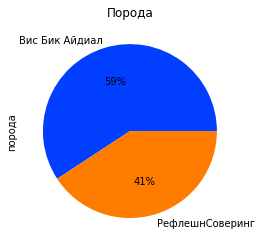

In [36]:
palette_color = sns.color_palette('bright') 
ferma_main['порода'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Порода', colors = palette_color)
plt.show()

Более половины коров породы Вис Бик Айдиал

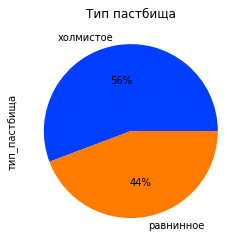

In [37]:
ferma_main['тип_пастбища'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Тип пастбища', colors = palette_color)
plt.show()

56% процентов пастбищ - холмистые

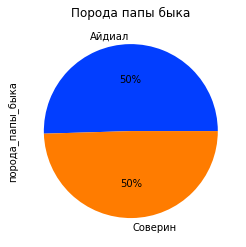

In [38]:
ferma_main['порода_папы_быка'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Порода папы быка', colors = palette_color)
plt.show()

Породы распределены 50/50

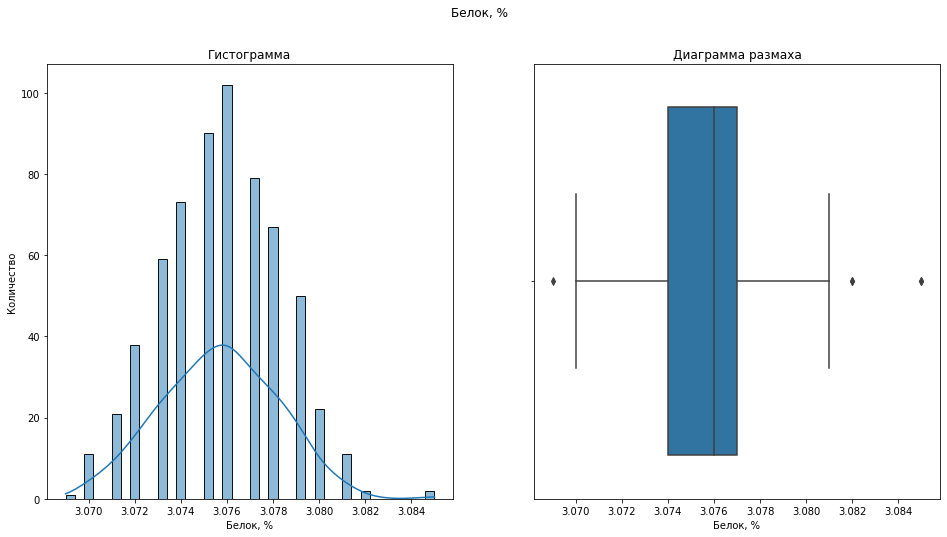

In [39]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'белок_%', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Белок, %')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'белок_%', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Белок, %')
fig.suptitle('Белок, %')
plt.show()

Есть 3 значения, похожих на выбросы, но они не сильно отличаются, поэтому удалять их не будем

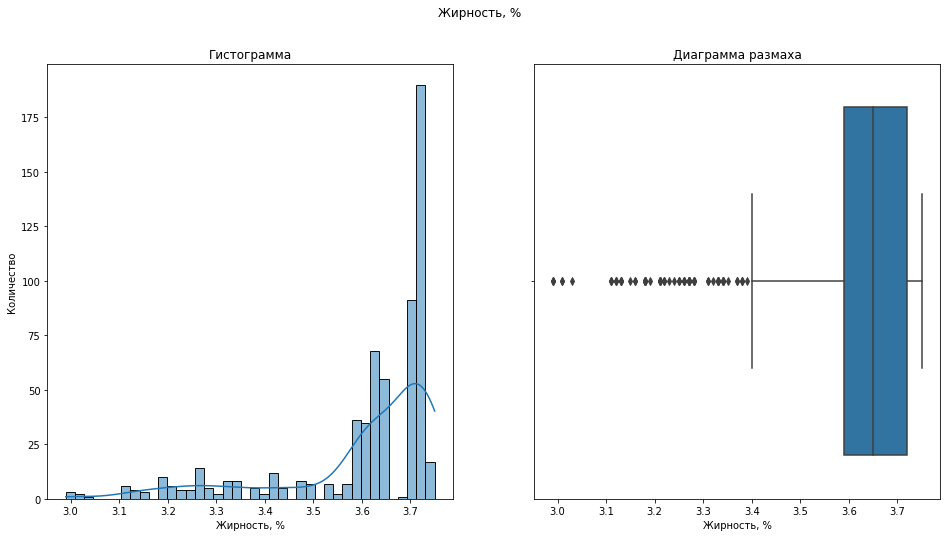

In [40]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = ferma_main,x = 'жирность_%', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Жирность, %')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')  
sns.boxplot(data = ferma_main,x = 'жирность_%', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
axs[1].set_xlabel('Жирность, %')
fig.suptitle('Жирность, %')
plt.show()

Есть значения, которые сильно выделяются (жирность менее 3.4%), однако, молоко с жирностью 3% это нормально, так что удалять эти значения мы не будем.

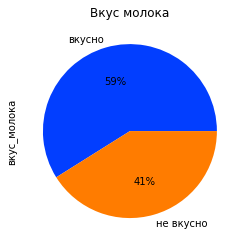

In [41]:
ferma_main['вкус_молока'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Вкус молока',colors = palette_color)
plt.show()

Около 60% молока - вкусное


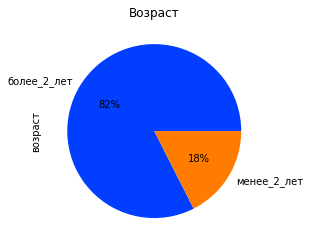

In [42]:
ferma_main['возраст'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Возраст',colors = palette_color)
plt.show()

У 80% коров возраст более 2 лет

Подведём итоги данного этапа.\
Были проанализированны все признаки, для количественных признаков были построены гистограммы и ящики с усами,
для категориальных - круговые диаграммы.\
Удой, кг - был один выброс, но после его удаления, распределение чем-то напоминает нормальное, с небольшими перепадами вверх/внизэ\
ЭКЕ - выбросов нет, медианное значение 14.7
Сырой протеин - Выбросов нет, медианное значение - 188э\
СПО - Выбросов нет, медианное значение - 0.93. На графике видны некоторые наиболее часто встречающиеся значенияэ\
Порода - Более половины коров породы Вис Бик Айдиал.\
Тип пастбища - 56% процентов пастбищ: холмистые.\
Порода папы быка - Породы распределены 50/50.\
Жирность: медианное значение - 3.650000. Есть значения, которые сильно выделяются (жирность менее 3.4%), однако, молоко с жирностью 3% это нормально, так что удаление выбросов я не производил.\
Белок: Есть 3 значения, похожих на выбросы, но они не сильно отличаются, поэтому удалять их не будем, медианное значение -  3.076000.\
Около 60% молока - вкусное.\
У 80% коров возраст более 2 лет.

## Корреляционный анализ

После анализа гистограмм в предыдущем пункте можно сказать, что у многих параметров распределение не нормальное, поэтому будем использовать коэффицент корреляции Спирмена

In [43]:
ferma_main.corr(method='spearman').style.background_gradient(cmap ='coolwarm')

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),жирность_%,белок_%
id,1.000000,-0.003097,-0.022382,-0.037108,-0.021642,0.038631,0.003743
удой_кг,-0.003097,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке(энергетическая_кормовая_единица),-0.022382,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
сырой_протеин_г,-0.037108,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо(сахаро_протеиновое_соотношение),-0.021642,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
жирность_%,0.038631,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
белок_%,0.003743,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


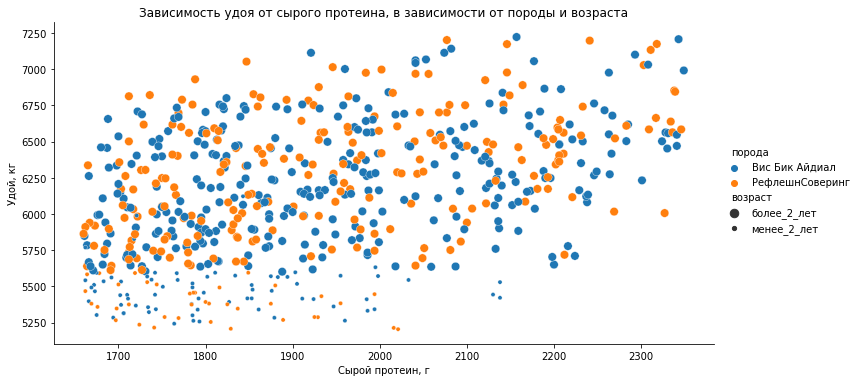

In [44]:
sns.relplot(data = ferma_main, x = 'сырой_протеин_г', y ='удой_кг', hue = 'порода', size = 'возраст', aspect = 2)
plt.title('Зависимость удоя от сырого протеина, в зависимости от породы и возраста')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и сырого протеина: 0.437 - умеренная положительная корреляция, о сильной зависимости говорить нельзя.
Также есть зависимость и от возраста коров: удой у коров, старше 2х лет больше

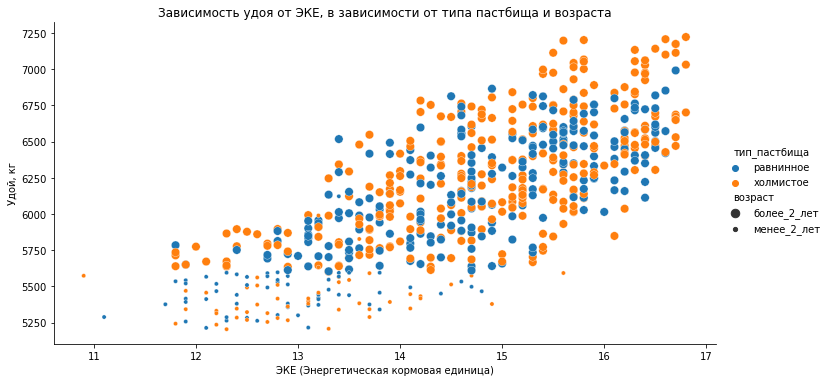

In [45]:
sns.relplot(data = ferma_main, x = 'эке(энергетическая_кормовая_единица)', y ='удой_кг', hue = 'тип_пастбища', size = 'возраст', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ, в зависимости от типа пастбища и возраста')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и ЭКЕ 0.765 - сильная положительная корреляция, можно говорить о зависимости данных переменных, у более взрослых коров - больше удой

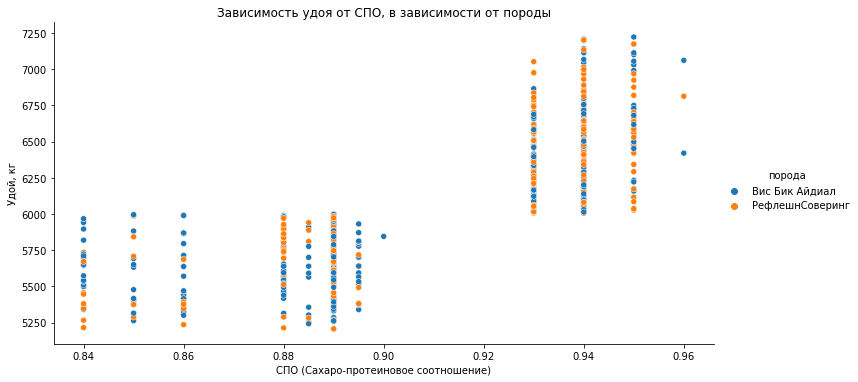

In [46]:
sns.relplot(data = ferma_main, x = 'спо(сахаро_протеиновое_соотношение)', y ='удой_кг', hue = 'порода', aspect = 2)
plt.title('Зависимость удоя от СПО, в зависимости от породы')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и СПО - 0.78, что говорит о сильной зависимости этих двух переменных, однако зависимость - нелинейная

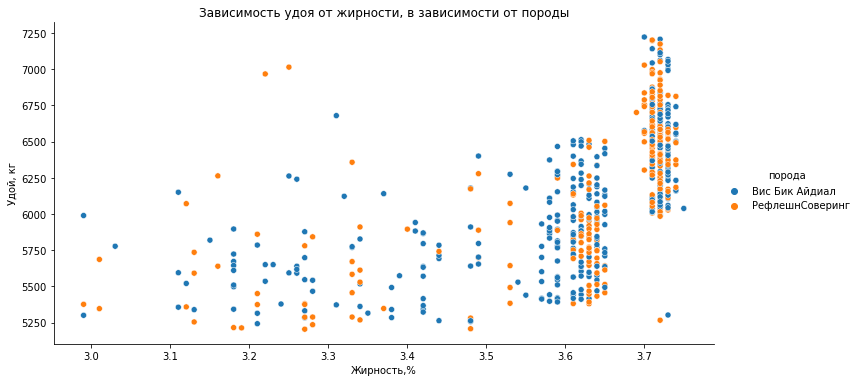

In [47]:
sns.relplot(data = ferma_main, x = 'жирность_%', y ='удой_кг', hue = 'порода', aspect = 2)
plt.title('Зависимость удоя от жирности, в зависимости от породы')
plt.xlabel('Жирность,%')
plt.ylabel('Удой, кг')
plt.show()

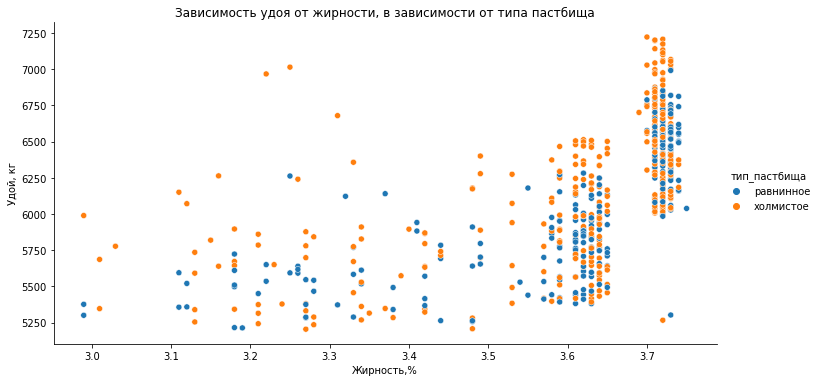

In [48]:
sns.relplot(data = ferma_main, x = 'жирность_%', y ='удой_кг', hue = 'тип_пастбища', aspect = 2)
plt.title('Зависимость удоя от жирности, в зависимости от типа пастбища')
plt.xlabel('Жирность,%')
plt.ylabel('Удой, кг')
plt.show()

Корреляция удоя и жирности - 0.68, что говорит о умеренной положительной зависимости этих двух переменных, однако зависимость - нелинейная

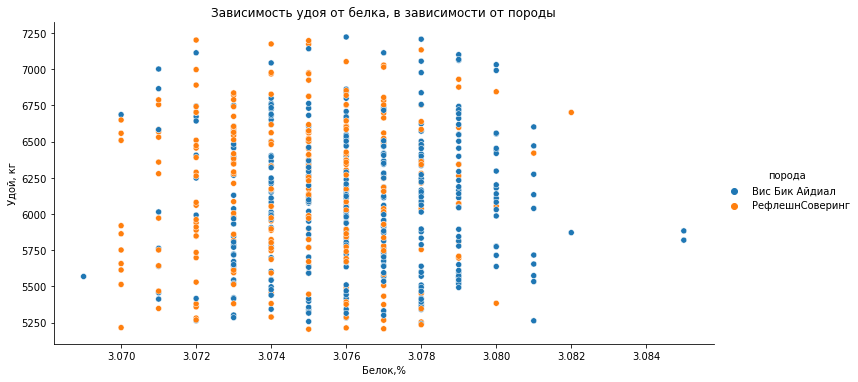

In [49]:
sns.relplot(data = ferma_main, x = 'белок_%', y ='удой_кг', hue = 'порода', aspect = 2)
plt.title('Зависимость удоя от белка, в зависимости от породы')
plt.xlabel('Белок,%')
plt.ylabel('Удой, кг')
plt.show()

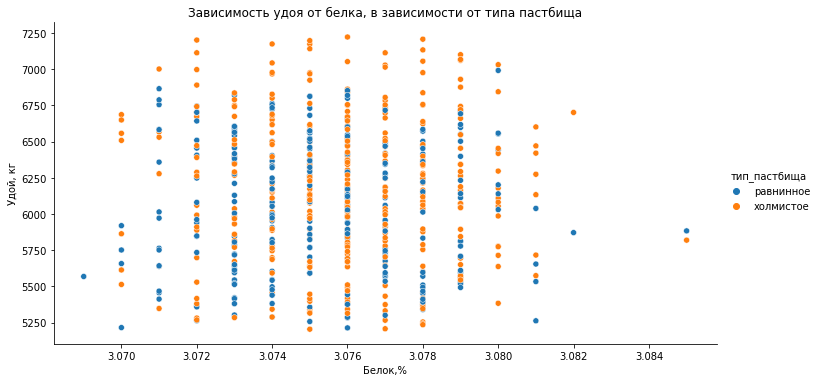

In [50]:
sns.relplot(data = ferma_main, x = 'белок_%', y ='удой_кг', hue = 'тип_пастбища', aspect = 2)
plt.title('Зависимость удоя от белка, в зависимости от типа пастбища')
plt.xlabel('Белок,%')
plt.ylabel('Удой, кг')
plt.show()

Коэффицент корреляции удоя и белка: -0.005, так что говорить о зависимости нельзя.

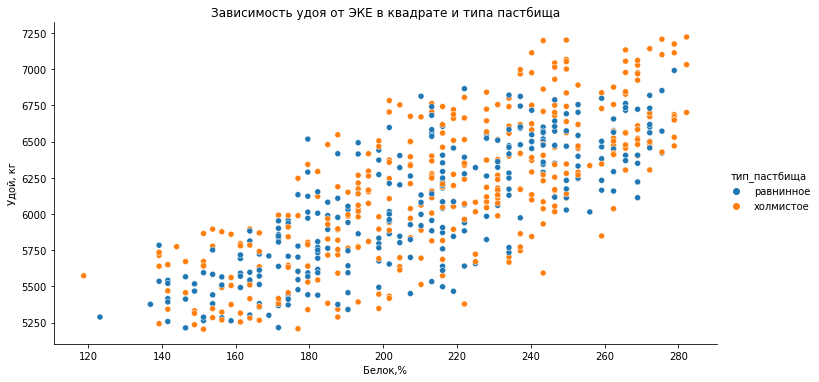

In [51]:
#Добавим новый признак ЭКЕ в кв.
ferma_main['эке_в_квадрате'] = ferma_main['эке(энергетическая_кормовая_единица)']**2
sns.relplot(data = ferma_main, x = 'эке_в_квадрате', y ='удой_кг', hue = 'тип_пастбища', aspect = 2)
plt.title('Зависимость удоя от ЭКЕ в квадрате и типа пастбища')
plt.xlabel('Белок,%')
plt.ylabel('Удой, кг')
plt.show()

In [52]:
ferma_main['удой_кг'].corr(ferma_main['эке_в_квадрате'], method='spearman')

0.7651443116006692

Подведём итоги\
Зависимость удоя от сырого протеина - умеренная, коэффицент корреляции 0.437\
Корреляция удоя и ЭКЕ 0.765 - то есть наблюдается сильная зависимость, но не совсем линейная.\
Корреляция удоя и СПО - 0.78, что говорит о сильной зависимости этих двух переменных, однако зависимость - нелинейная\
Корреляция удоя и жирности - 0.68, что говорит о умеренной положительной зависимости этих двух переменных, однако зависимость - нелинейная\
Коэффицент корреляции удоя и белка: -0.005, так что говорить о зависимости нельзя.\
\
Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. У нас таких значений нет, так что говорить о мультиколлинеарности мы не можем

## Обучение модели линейной регрессии

Для датасета с входными признаками помимо целевого я отбросил столбцы с белком, жирностью и вкусом полученного молока, т.к. эти показатели влиют не на удой, а на свойства полученного молока.

In [53]:
y = ferma_main['удой_кг']
X = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'id', 'эке_в_квадрате'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE
    ) 
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['эке(энергетическая_кормовая_единица)', 'сырой_протеин_г', 'спо(сахаро_протеиновое_соотношение)']

In [54]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [55]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [56]:
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.7844078173416967

Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания. Значение не сильно далеко от 1, но и не близко тоже, так что надо улучшать модель

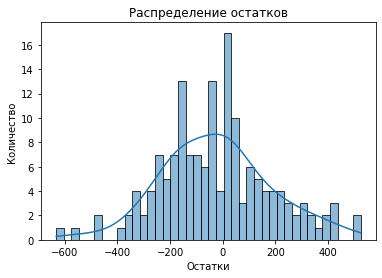

In [57]:
sns.histplot(data = y_test-predictions, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

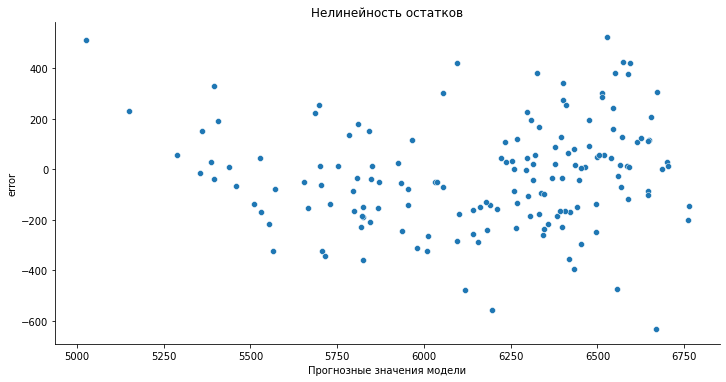

In [58]:
sns.relplot(x = predictions, y =y_test-predictions, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error')
plt.title('Нелинейность остатков')
plt.show()

Остатки распределены мультимодально (есть несколько горбов), помимо этого, после прогноза в 6000 разброс остатков больше, чем в первой половине, так что модель требует улучшения, скорее всего есть какой-то паттерн, который наша модель не уловила.

Подведём итоги, после создания первой модели:
1) Для датасета с входными признаками помимо целевого я отбросил столбцы с белком, жирностью и вкусом полученного молока, т.к. эти показатели влиют не на удой, а на свойства полученного молока.\
2) r2 = 0.7844078173416967 (Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания. Значение не сильно далеко от 1, но и не близко тоже, так что надо улчушать модель)\
3) Остатки распределены мультимодально (есть несколько горбов), так что модель требует улучшения

In [59]:
mean_squared_error(y_test, predictions) 

43887.015009660514

In [60]:
mean_squared_error(y_test, predictions, squared = False) 

209.4922791170608

In [61]:
mean_absolute_error(y_test, predictions) 

164.24194463474925

In [62]:
#Переведём СПО в категориальный бинарный признак
ferma_main.loc[ferma_main['спо(сахаро_протеиновое_соотношение)'] >= 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 1
ferma_main.loc[ferma_main['спо(сахаро_протеиновое_соотношение)'] < 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 0
ferma_main

,id,удой_кг,эке(энергетическая_кормовая_единица),сырой_протеин_г,спо(сахаро_протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,эке_в_квадрате
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,1.0,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16
625,626,5513,12.9,1700,0.0,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41
626,627,5970,14.4,1837,0.0,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36
627,628,5746,13.8,1994,0.0,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44


In [63]:
y = ferma_main['удой_кг']
X = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'эке(энергетическая_кормовая_единица)','id'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 
cat_col_names = ['спо(сахаро_протеиновое_соотношение)','порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names = ['сырой_протеин_г', 'эке_в_квадрате']

In [64]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [65]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [66]:
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.8180879926867504

Значение метрики выросло на с 0.79 до 0.818, рост есть, но всё ещё незначительный

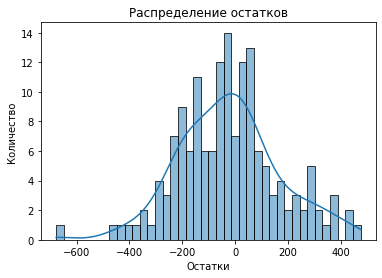

In [67]:
sns.histplot(data = y_test-predictions, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

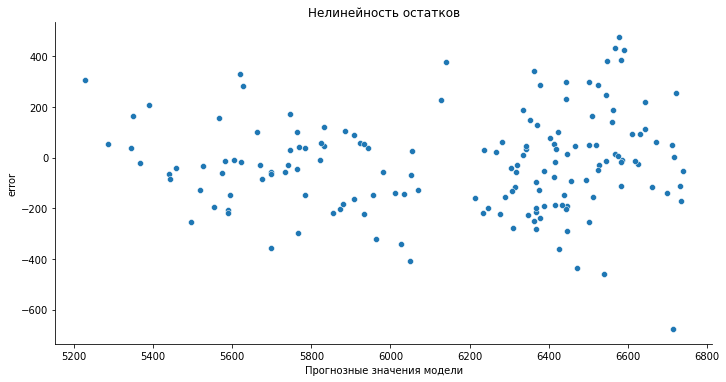

In [68]:
sns.relplot(x = predictions, y =y_test-predictions, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error')
plt.title('Нелинейность остатков')
plt.show()

Распределение - бимодальное (есть два горба), уже лучше, по сравнению с предыдущей моделью, да и распределение остатков стало по лучше

Подведём итоги, после создания второй модели:

1) По сравнению с первой моделью была устранена нелинейность в признаках\
2) r2 = 0.8180879926867504 (Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания. Значение не сильно далеко от 1, но и не близко тоже, так что надо улчушать модель)\
3) Остатки распределены бимодально (есть два гроба), так что модель требует улучшения

In [69]:
mean_squared_error(y_test, predictions) 

37030.91131113693

In [70]:
mean_squared_error(y_test, predictions, squared = False) 

192.43417396901447

In [71]:
mean_absolute_error(y_test, predictions) 

149.03965222364596

In [72]:
#Добавим столбец с именем отца
ferma_main = pd.merge(ferma_main, ferma_dad, on = 'id')

In [73]:
y = ferma_main['удой_кг']
X = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'эке(энергетическая_кормовая_единица)','id'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

cat_col_names = ['спо(сахаро_протеиновое_соотношение)','порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'эке_в_квадрате']

In [74]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [75]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2 = r2_score(y_test, predictions) 
r2

0.8247542745210404

Значение метрики немного, но выросло

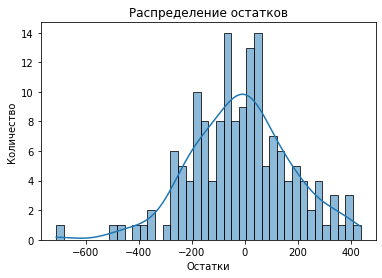

In [76]:
sns.histplot(data = y_test-predictions, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

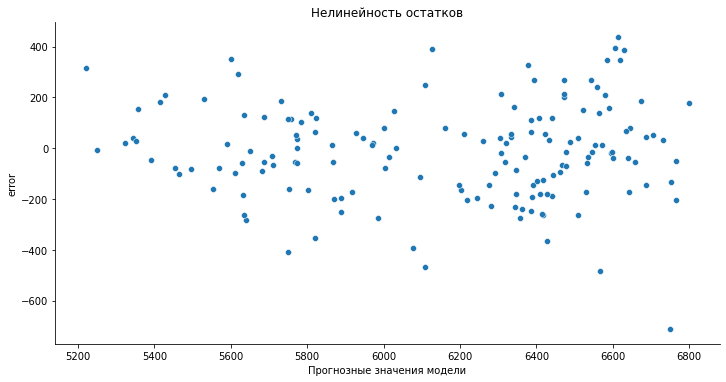

In [77]:
sns.relplot(x = predictions, y =y_test-predictions, aspect = 2)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error')
plt.title('Нелинейность остатков')
plt.show()

Подведём итоги, после создания третей модели:

1) По сравнению со второй моделью был добавлен ещё один признак\
2) r2 = 0.8247542745210404 (Чем ближе метрика к единице, тем лучше обобщающая способность модели и тем точнее будут предсказания. Значение не сильно далеко от 1, но и не близко тоже) - Лучший показатель за три модели.\
3) Остатки распределены чем-то напоминающе нормальное распределение, но есть выбросы, диаграмма рассеяния приняла практически хороший вид

Учитывая значение метрики и распределение, то можно сделать вывод, что лучшая модель - третья

In [78]:
mean_squared_error(y_test, predictions) 


35673.889886181976

In [79]:
mean_squared_error(y_test, predictions, squared = False) 

188.8753289505593

In [80]:
mean_absolute_error(y_test, predictions) 

146.16302445362322

Сравнивая метрики MSE, MAE и RMSE можно прийти к выводу, что третья модель наилучшая, ведь все метрики у неё лучше

Спрогнозируем удой коров в датасете `cow_buy`

In [81]:
cow_buy['эке(энергетическая_кормовая_единица)'] = ferma_main['эке(энергетическая_кормовая_единица)'].mean()*1.05
cow_buy['эке_в_квадрате'] = cow_buy['эке(энергетическая_кормовая_единица)'] ** 2
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean()*1.05
cow_buy['спо(сахаро_протеиновое_соотношение)'] = ferma_main['спо(сахаро_протеиновое_соотношение)'].mean()*1.05
cow_buy['эке_в_квадрате'] = cow_buy['эке(энергетическая_кормовая_единица)']**2
cow_buy.loc[cow_buy['спо(сахаро_протеиновое_соотношение)'] >= 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 1
cow_buy.loc[cow_buy['спо(сахаро_протеиновое_соотношение)'] < 0.92, 'спо(сахаро_протеиновое_соотношение)'] = 0
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение)
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0


In [82]:
X = cow_buy.drop(['текущий_уровень_белок_%', 'текущая_жирность_%', 'эке(энергетическая_кормовая_единица)'], axis = 1)
X = X[['сырой_протеин_г', 'спо(сахаро_протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'эке_в_квадрате','имя_папы']]
cat_col_names = ['спо(сахаро_протеиновое_соотношение)','порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'эке_в_квадрате']

In [83]:
X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
X = pd.concat([X_ohe, X_scaled], axis=1)

In [84]:
predictions = model_lr.predict(X)
cow_buy['удой_кг_прогноз'] = predictions
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение),удой_кг_прогноз
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6024.931199
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,5930.219946
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.0,6239.309548
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,6188.366237


In [85]:
st.t.interval(confidence=0.975, df=len(cow_buy['удой_кг_прогноз'])-1, loc=np.mean(cow_buy['удой_кг_прогноз']), scale=st.sem(cow_buy['удой_кг_прогноз'])) 

(6020.6847311384245, 6201.694883709493)

Во время данного этапа были обучены три модели линейной регрессии, посчитаны для них метрики и спрогнозирован удов коров, которых фермер хочет купить.

## Обучение модели логистической регрессии

In [86]:
ferma_main.loc[ferma_main['вкус_молока'] == 'вкусно', 'вкус_молока'] = 1
ferma_main.loc[ferma_main['вкус_молока'] == 'не вкусно', 'вкус_молока'] = 0
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].astype('bool')
y = ferma_main['вкус_молока']
X = ferma_main.drop(['вкус_молока','id', 'эке(энергетическая_кормовая_единица)', 'удой_кг'], axis = 1)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

In [87]:
cat_col_names = ['спо(сахаро_протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'жирность_%', 'белок_%', 'эке_в_квадрате']

In [88]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [89]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train) 

In [90]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6305732484076433

In [91]:
recall_score(y_test, y_pred)

0.8636363636363636

In [92]:
precision_score(y_test, y_pred)

0.6229508196721312

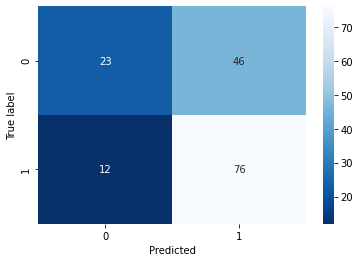

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Метрика recall показывает все ли истинные получили 1, в нашем случае она составляет всего 0.8636363636363636, метрика precision показывает количество случаев, когда вместо 0 предсказали 1, значение метрики - 0.6229508196721312\
Для заказчика главное - вкус молока, значит нам необходимо, чтобы precision равнялась 100 (то есть критичнее ошибка первого рода) (чтобы коровы, дающие невкусное молоко, не были куплены). Изменим порог классификации так, чтобы достичь этого значения.

In [94]:
porog = 0.5
while True:
    porog += 0.01
    y_pred = (clf.predict_proba(X_test)[:,1] >= porog).astype(bool)
    if (precision_score(y_test, y_pred) == 1): break
porog

0.8100000000000003

In [95]:
y_pred = (clf.predict_proba(X_test)[:,1] >= 0.81).astype(bool)

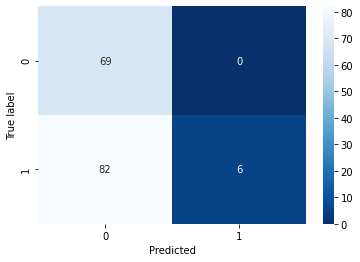

In [96]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

При пороге в 0.79 количество ошибок 1ого рода составляет ноль

In [97]:
accuracy_score(y_test, y_pred)

0.47770700636942676

In [98]:
recall_score(y_test, y_pred)

0.06818181818181818

In [99]:
precision_score(y_test, y_pred)

1.0

Количество ошибок второго рода сильно увеличилось, но количество ошибок первого рода сведено к нулю.

In [100]:
cat_col_names = ['спо(сахаро_протеиновое_соотношение)', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'текущая_жирность_%', 'текущий_уровень_белок_%', 'эке_в_квадрате']
X = cow_buy.drop(['удой_кг_прогноз', 'эке(энергетическая_кормовая_единица)'] , axis = 1)

In [101]:
X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
X = pd.concat([X_ohe, X_scaled], axis=1)

In [102]:
predictions = (clf.predict_proba(X)[:,1] >= 0.81).astype(bool)
cow_buy['вкус_молока_прогноз'] = predictions
cow_buy.loc[cow_buy['вкус_молока_прогноз'] == True, 'вкус_молока_прогноз'] = 'вкусное'
cow_buy.loc[cow_buy['вкус_молока_прогноз'] == False, 'вкус_молока_прогноз'] = 'не вкусное'
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение),удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468,вкусное
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6024.931199,не вкусное
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,5930.219946,не вкусное
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.0,6239.309548,не вкусное
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.0,6188.366237,не вкусное


В рамках данного этапа была обучена модель логистическое регрессии, посчитаны метрики, подобран порог для сведения к нулю ошибки первого рода, а также спрогнозирован вкус молока.

## Итоговые выводы

In [103]:
cow_buy.loc[(cow_buy['удой_кг_прогноз'] > 6000) & (cow_buy['вкус_молока_прогноз'] == "вкусное")]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке(энергетическая_кормовая_единица),эке_в_квадрате,сырой_протеин_г,спо(сахаро_протеиновое_соотношение),удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.0,6256.139468,вкусное
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0.0,6046.760839,вкусное


Эти две бурёнки единственные, удовлетворяющие интересам фермера, т.е. с удоем более 6000 литров и вкусным молоком. Риск при их покупке минимальный.

Для улучшения качества регрессионой модели я использовал стандартизацию и кодирование категориальных признаков. Способов улучшения модели я не вижу, так как все доступные уже использовал.

При анализе рисков/экономических вопросов важные метрики precision и recall, которые позволяют отследить ошибки первого или второго рода и минимизировать экономические убытки.

В рамках данной работы был изучены несколько датафреймов. Они были проверены на пропуски и дубликаты. Пропусков не было, дубликаты были удалены. Далее были проанализированы данные, построены гистограммы, круговые диаграммы, графики зависимости и были рассчитаны коэффиценты корреляции для признаков датафреймов. После чего были обучены три модели линейной регрессии, одна модель логистической регрессии и были подведены итоги.